In [75]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nutrition-facts/menu.csv


In [76]:
import numpy as np 
import pandas as pd 
import os

import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
data = pd.read_csv("../input/nutrition-facts/menu.csv")
df = data.copy()

In [77]:
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [79]:
df.Category.unique()

array(['Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Salads',
       'Snacks & Sides', 'Desserts', 'Beverages', 'Coffee & Tea',
       'Smoothies & Shakes'], dtype=object)

In [80]:
df.isnull().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

In [81]:
df.pivot_table('Sugars','Category')

,Sugars
Category,
Beef & Pork,8.800000
Beverages,27.851852
Breakfast,8.261905
Chicken & Fish,7.333333
Coffee & Tea,39.610526
Desserts,26.142857
Salads,6.833333
Smoothies & Shakes,77.892857
Snacks & Sides,4.076923


<AxesSubplot:xlabel='Category'>

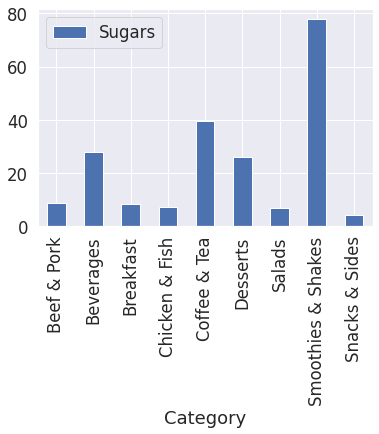

In [82]:
df.pivot_table('Sugars','Category').plot(kind='bar')

<AxesSubplot:xlabel='Category'>

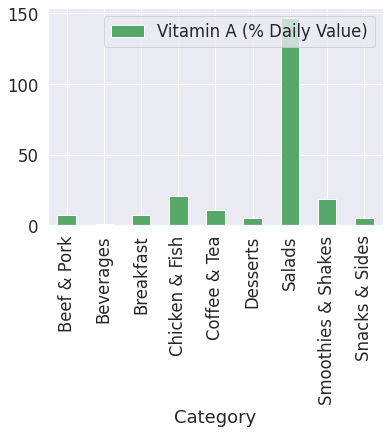

In [83]:
df.pivot_table('Vitamin A (% Daily Value)','Category').plot(kind='bar', color='g')

<AxesSubplot:xlabel='Category'>

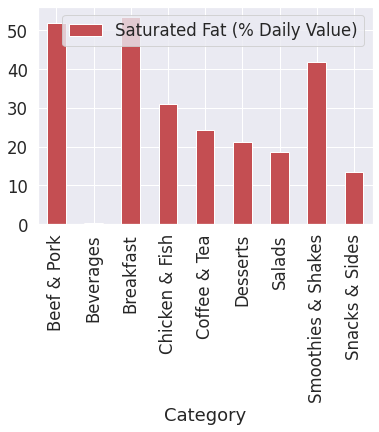

In [84]:
df.pivot_table('Saturated Fat (% Daily Value)','Category').plot(kind='bar', color='r')

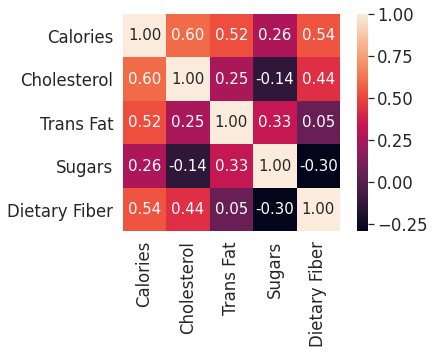

In [85]:
cols = ['Calories','Cholesterol','Trans Fat','Sugars','Dietary Fiber']
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale = 1.5)
hm = sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols, xticklabels = cols)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


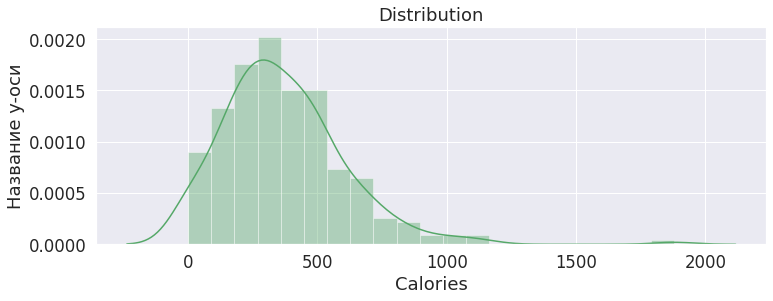

In [86]:
plt.figure(figsize=(12,4))
plt.title('Distribution')
plt.xlabel('Название Х-оси')
plt.ylabel('Название y-оси')

ax = sns.distplot(df['Calories'], color='g')


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


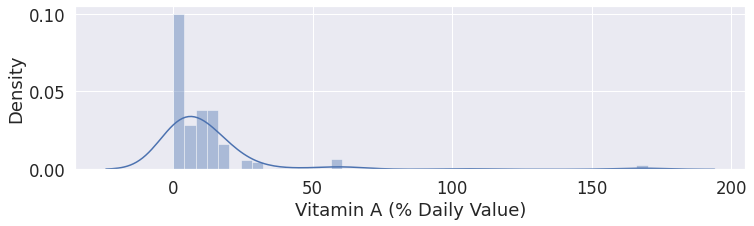

In [87]:
plt.figure(figsize=(12,3))
ax = sns.distplot(df['Vitamin A (% Daily Value)'], color='b')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


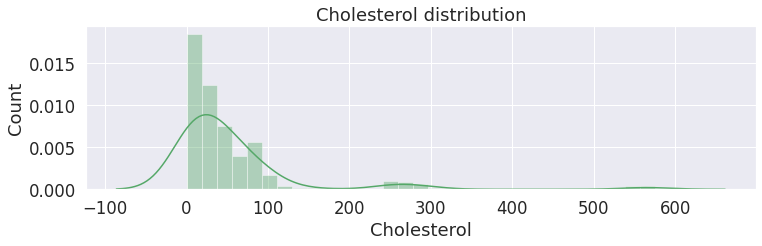

In [88]:
plt.figure(figsize=(12,3))
plt.xlabel('Cholesterol')
plt.ylabel('Count')
plt.title('Cholesterol distribution')

figure = sns.distplot(df['Cholesterol'], color='g')

In [89]:
alt.Chart(df).mark_point()

alt.Chart(...)

In [90]:
alt.Chart(df).mark_point().encode(
x='Cholesterol',
y = 'Category')

alt.Chart(...)

In [91]:
alt.Chart(df).mark_tick().encode(
    x='Cholesterol',
    y='Category')

alt.Chart(...)

In [111]:
# можно крутить и приближать!

alt.Chart(df).mark_point().encode(
    x='Vitamin C (% Daily Value)',
    y='Category').interactive()

alt.Chart(...)

In [93]:
alt.Chart(df).mark_point().encode(
    x='Iron (% Daily Value)',
    y='Category',
    
    # :O for "ordinal" or "ordered categories"
    color='Saturated Fat:O' #3-d dimention feature!
    ).interactive()
    

alt.Chart(...)

In [109]:
alt.Chart(df).mark_bar().encode(
    x=alt.X('Carbohydrates (% Daily Value)', bin=True),
    y='count()')

alt.Chart(...)

In [95]:
alt.Chart(df).mark_bar().encode(
    x=alt.X('Carbohydrates (% Daily Value)', bin=alt.Bin(maxbins=30)),
    y='count()',
    color='Saturated Fat',
    column ='Category')

alt.Chart(...)

In [96]:
def plot(grouped):
    item = grouped["Item"].sum()
    item_list = item.sort_index()
    item_list = item_list[-20:]
    plt.figure(figsize=(9,10))
    graph = sns.barplot(item_list.index,item_list.values)
    labels = [aj.get_text()[-40:] for aj in graph.get_yticklabels()]
    graph.set_yticklabels(labels)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


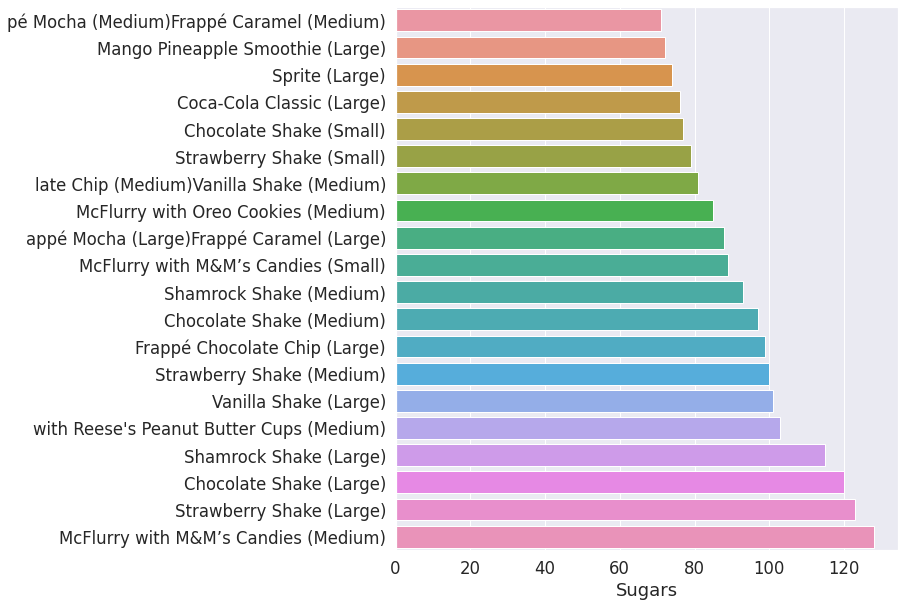

In [97]:
sugar = df.groupby(df["Sugars"])
plot(sugar)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


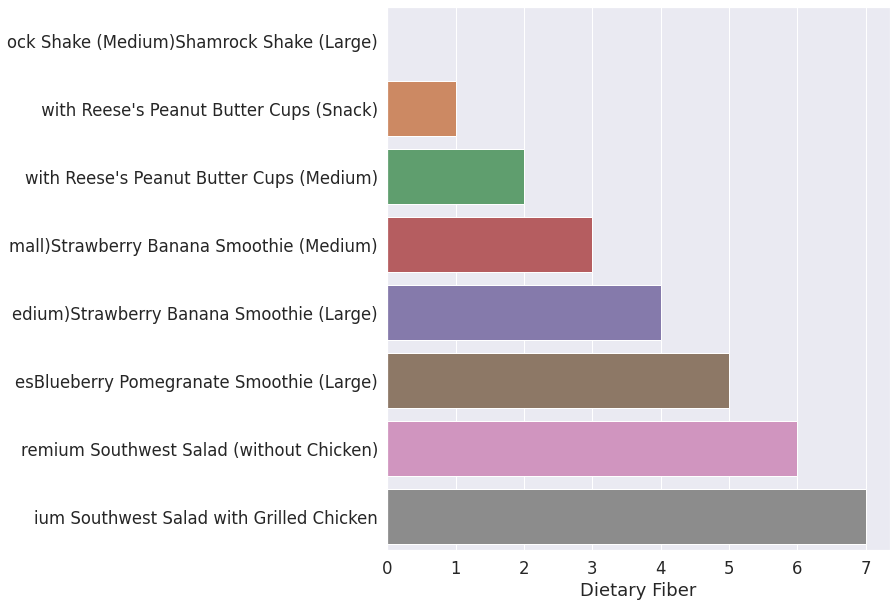

In [98]:
fiber = df.groupby(df["Dietary Fiber"])
plot(fiber)

In [99]:
df.columns

Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')

In [133]:
bigmac = df.loc[df['Item'] == 'Big Mac']
cola_classic_small = df.loc[df['Item'] == 'Coca-Cola Classic (Small)']
cola_classic_large = df.loc[df['Item'] == 'Coca-Cola Classic (Large)']
diet_cola_small = df.loc[df['Item'] == 'Diet Coke (Small)']
small_french_fries = df.loc[df['Item'] == 'Small French Fries']


cola_classic_large = cola_classic_large._get_numeric_data()
cola_classic_small = cola_classic_small._get_numeric_data()
diet_cola_small = diet_cola_small._get_numeric_data()
small_french_fries = small_french_fries._get_numeric_data()
bigmac = bigmac._get_numeric_data()


<AxesSubplot:>

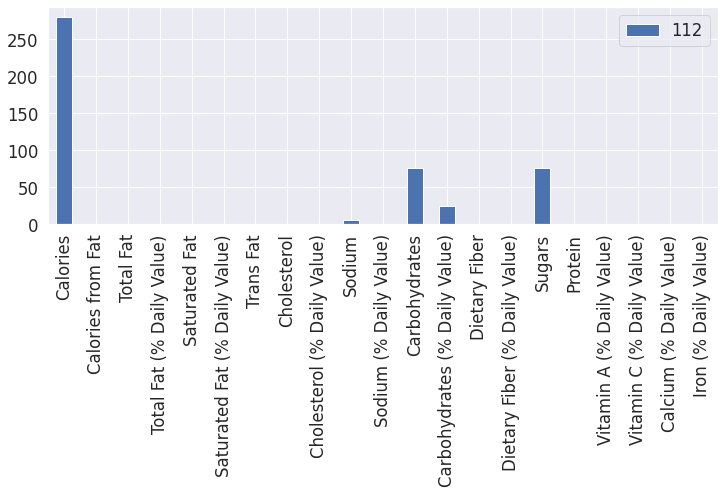

In [137]:
cola_classic_large.T.plot(kind='bar',figsize=(12,4), color='b')
    
    

<AxesSubplot:>

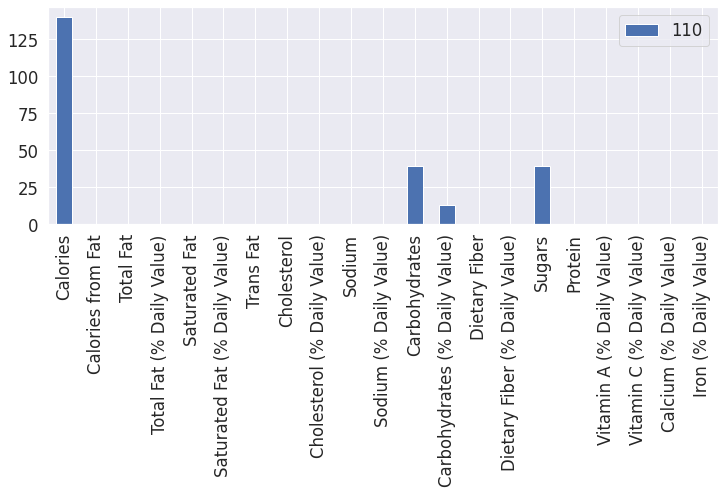

In [138]:
cola_classic_small.T.plot(kind='bar',figsize=(12,4), color='b')

<AxesSubplot:>

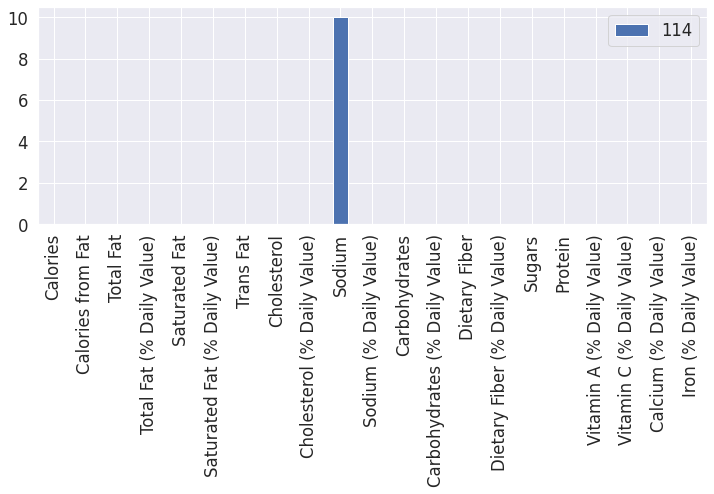

In [141]:
diet_cola_small.T.plot(kind='bar',figsize=(12,4), color='b')

<AxesSubplot:>

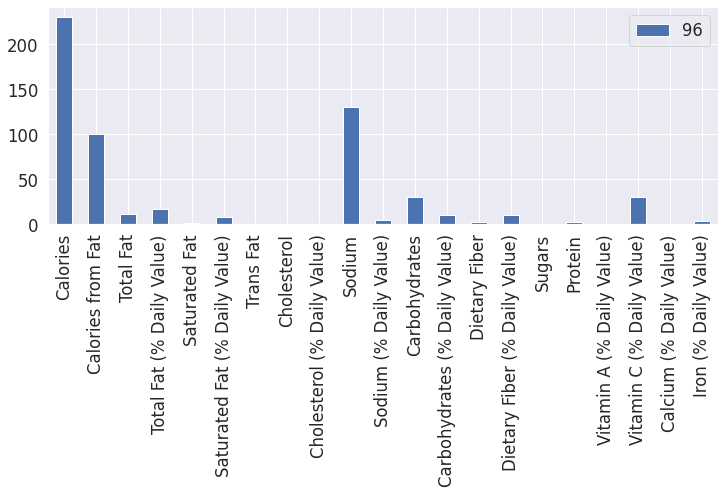

In [142]:
small_french_fries.T.plot(kind='bar',figsize=(12,4), color='b')

<AxesSubplot:>

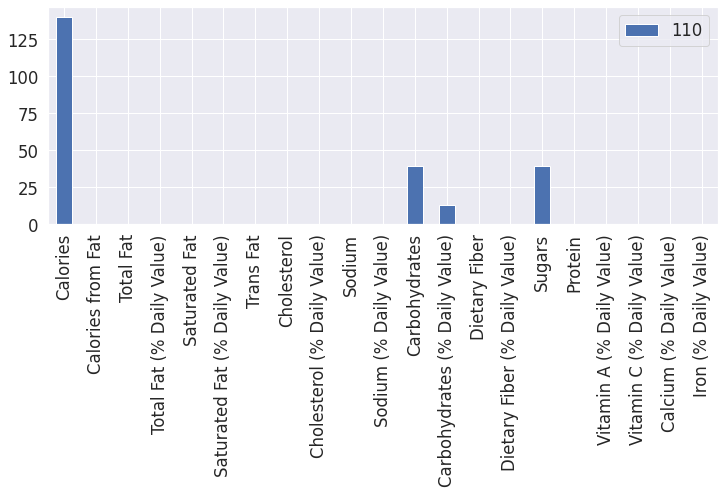

In [136]:
cola_classic_small.T.plot(kind='bar',figsize=(12,4), color='b',title='cola_classic_small')

<AxesSubplot:title={'center':'BigMac'}>

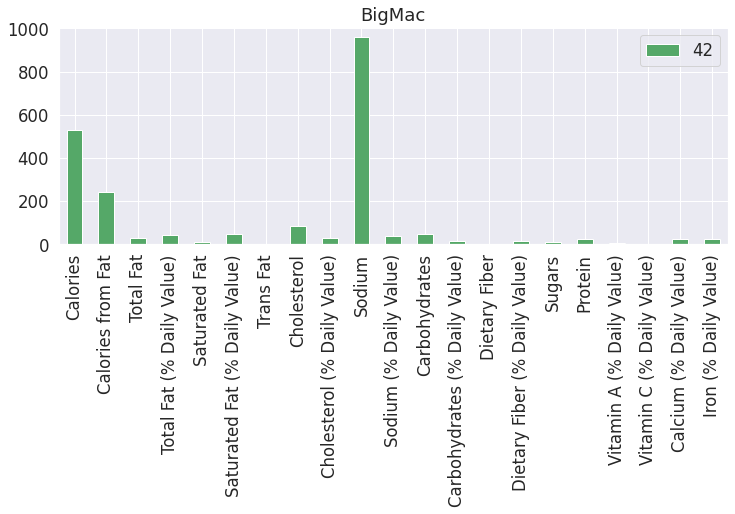

In [144]:
bigmac.T.plot(kind='bar',figsize=(12,4), color='g', title='BigMac')